In [94]:
import tensorflow as tf
import imageio
import natsort
import glob
import PIL
import IPython
import numpy as np
import matplotlib.pyplot as plt
from model import CVAE
import train
from tensorflow_probability import distributions as tfd
from train import generate_and_save_images
from dataset import preprocess_images
from tensorflow.linalg import matvec
from tensorflow_addons.image import rotate
import os
import random

In [95]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./image/method5/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

In [96]:
def generate_and_save_images(predictions, degree, dire):
    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')
    file_dir = './image/'+ dire
    if not os.path.exists(file_dir):
        os.makedirs(file_dir)
    plt.savefig(file_dir +'/image_at_epoch_{:04d}.png'.format(degree))
    plt.close()


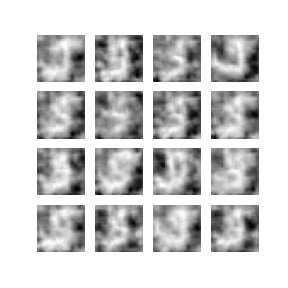

In [97]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

In [98]:
model = CVAE(latent_dim=16)
checkpoint = tf.train.Checkpoint(model=model)
checkpoint.restore("checkpoints/2_18method5/ckpt-10")

In [99]:
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()
test_images = preprocess_images(test_images)

In [100]:
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(10000).batch(32))

num_examples_to_generate = 16

In [101]:
for test_batch in test_dataset.take(1):
    test_sample = test_batch[0:num_examples_to_generate, :, :, :]

In [102]:
def generate_images(model, data):
    fig = plt.figure(figsize=(4, 4))
    for i in range(data.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(data[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.show()

# original image

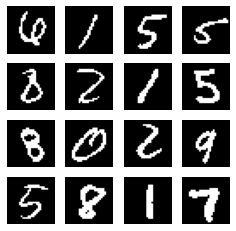

In [103]:
generate_images(model, test_sample)

# After Model translate

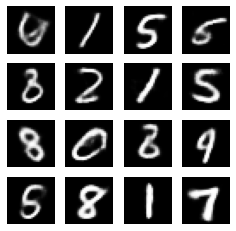

In [104]:
mean, logvar = model.encode(test_sample)
z = model.reparameterize(mean, logvar)
predictions = model.sample(z)
generate_images(model, predictions)

In [105]:
mean, logvar = model.encode(test_sample)
r_m = np.identity(model.latent_dim)
z = model.reparameterize(mean, logvar)
for i in range (10, 120, 10):  
    theta = np.radians(i)
    c, s = np.cos(theta), np.sin(theta)
    r_m[0, [0, 1]], r_m[1, [0, 1]] = [c, s], [-s, c]
    rota_z = matvec(tf.cast(r_m, dtype=tf.float32), z)
    phi_z = model.decode(rota_z)
    generate_and_save_images(phi_z, i, 'test1')

In [51]:
anim_file = 'rote_ori.gif'
with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./image/test_dir1/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)


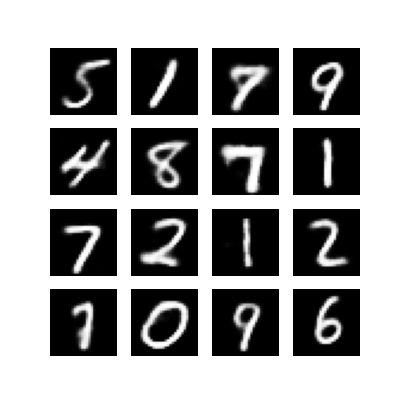

In [52]:
embed.embed_file(anim_file)

In [66]:
for i in range (10, 120, 10):
    r_x = rotate(test_sample, -i)
    mean, logvar = model.encode(test_sample)
    r_m = np.identity(model.latent_dim)
    z = model.reparameterize(mean, logvar)
    theta = np.radians(i)
    c, s = np.cos(theta), np.sin(theta)
    r_m[0, [0, 1]], r_m[1, [0, 1]] = [c, s], [-s, c]
    rota_z = matvec(tf.cast(r_m, dtype=tf.float32), z)
    phi_z = model.decode(rota_z)
    generate_and_save_images(phi_z, i, 'test2')

In [67]:
anim_file = 'rote_ori.gif'
with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./image/test2/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)


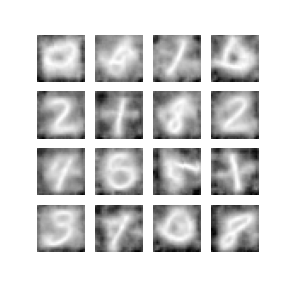

In [68]:
embed.embed_file(anim_file)

In [54]:
anim_file = 'rote_ori.gif'
with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./image/test_dir1/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

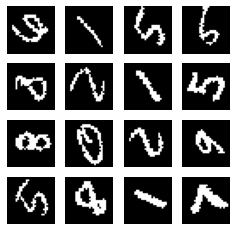

In [112]:
test = rotate(test_sample, 20)
generate_images(model, test)

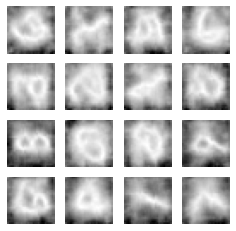

In [113]:
mean, logvar = model.encode(test)
r_m = np.identity(model.latent_dim)
z = model.reparameterize(mean, logvar)
prediction = model.decode(z)
generate_images(model, prediction)